## Computational complexity of algorithms and accuracy



In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 12

plt.style.use('tableau-colorblind10')

In [2]:
url = 'logs/models.txt'
df = pd.read_csv(url)

In [3]:
df.describe()

,macs,parameters
count,3.500000e+01,3.500000e+01
mean,6.351510e+09,5.052139e+07
std,6.685961e+09,5.508621e+07
min,4.252426e+07,1.235496e+06
25%,5.659043e+08,5.332784e+06
50%,4.111515e+09,2.383457e+07
75%,1.133300e+10,1.078390e+08
max,2.279560e+10,1.436782e+08


In [4]:
df['GFLOPS'] = (df['macs']) / (10 ** 9) 
df['TFLOPS'] = (df['macs']) / (10 ** 12)
df['Params(Million)'] = df['parameters'] / (10 ** 6)
df['Log'] = np.log(df['macs'])
df['Training 1 epoch(pfs-days)'] = df['GFLOPS'] * 2 * 3 * (1.2 * (10 ** 6))

In [5]:
print(df.GFLOPS.count())
df.head()

35


,model,macs,parameters,GFLOPS,TFLOPS,Params(Million),Log,Training 1 epoch(pfs-days)
0,alexnet,7.146919e+08,61100840.0,0.714692,0.000715,61.100840,20.387362,5.145782e+06
1,densenet121,2.865672e+09,7978856.0,2.865672,0.002866,7.978856,21.776069,2.063284e+07
2,densenet161,7.787013e+09,28681000.0,7.787013,0.007787,28.681000,22.775723,5.606649e+07
3,densenet169,3.398071e+09,14149480.0,3.398071,0.003398,14.149480,21.946474,2.446611e+07
4,densenet201,4.340971e+09,20013928.0,4.340971,0.004341,20.013928,22.191364,3.125499e+07


In [6]:
# fig = plt.figure(figsize=(12,7))
# plt.plot(df['model'],df['GFLOPS'],marker = "o",color='tab:green')
# plt.plot(df['model'],df['Params(Million)'],marker = "o",color='tab:blue')
# plt.xticks( rotation='vertical')
# plt.tight_layout()
# plt.show()

In [7]:
# fig = plt.figure(figsize=(12,7))
# plt.plot(df['model'],df['Training 1 epoch(pfs-days)'],marker = "o",color='tab:green')
# plt.xticks( rotation='vertical')
# plt.tight_layout()
# plt.show()

In [8]:
url = "logs/accuracy.csv" ##top 1 and top 5 error
df_accuracy = pd.read_csv(url)
print(df_accuracy.top1.count())

29


In [9]:
merge_df = df.merge(df_accuracy, on='model')

In [10]:
print(merge_df.top1.count())
merge_df.head()

29


,model,macs,parameters,GFLOPS,TFLOPS,Params(Million),Log,Training 1 epoch(pfs-days),top1,top5
0,alexnet,7.146919e+08,61100840.0,0.714692,0.000715,61.100840,20.387362,5.145782e+06,43.45,20.91
1,densenet121,2.865672e+09,7978856.0,2.865672,0.002866,7.978856,21.776069,2.063284e+07,25.35,7.83
2,densenet161,7.787013e+09,28681000.0,7.787013,0.007787,28.681000,22.775723,5.606649e+07,22.35,6.20
3,densenet169,3.398071e+09,14149480.0,3.398071,0.003398,14.149480,21.946474,2.446611e+07,24.00,7.00
4,densenet201,4.340971e+09,20013928.0,4.340971,0.004341,20.013928,22.191364,3.125499e+07,22.80,6.43


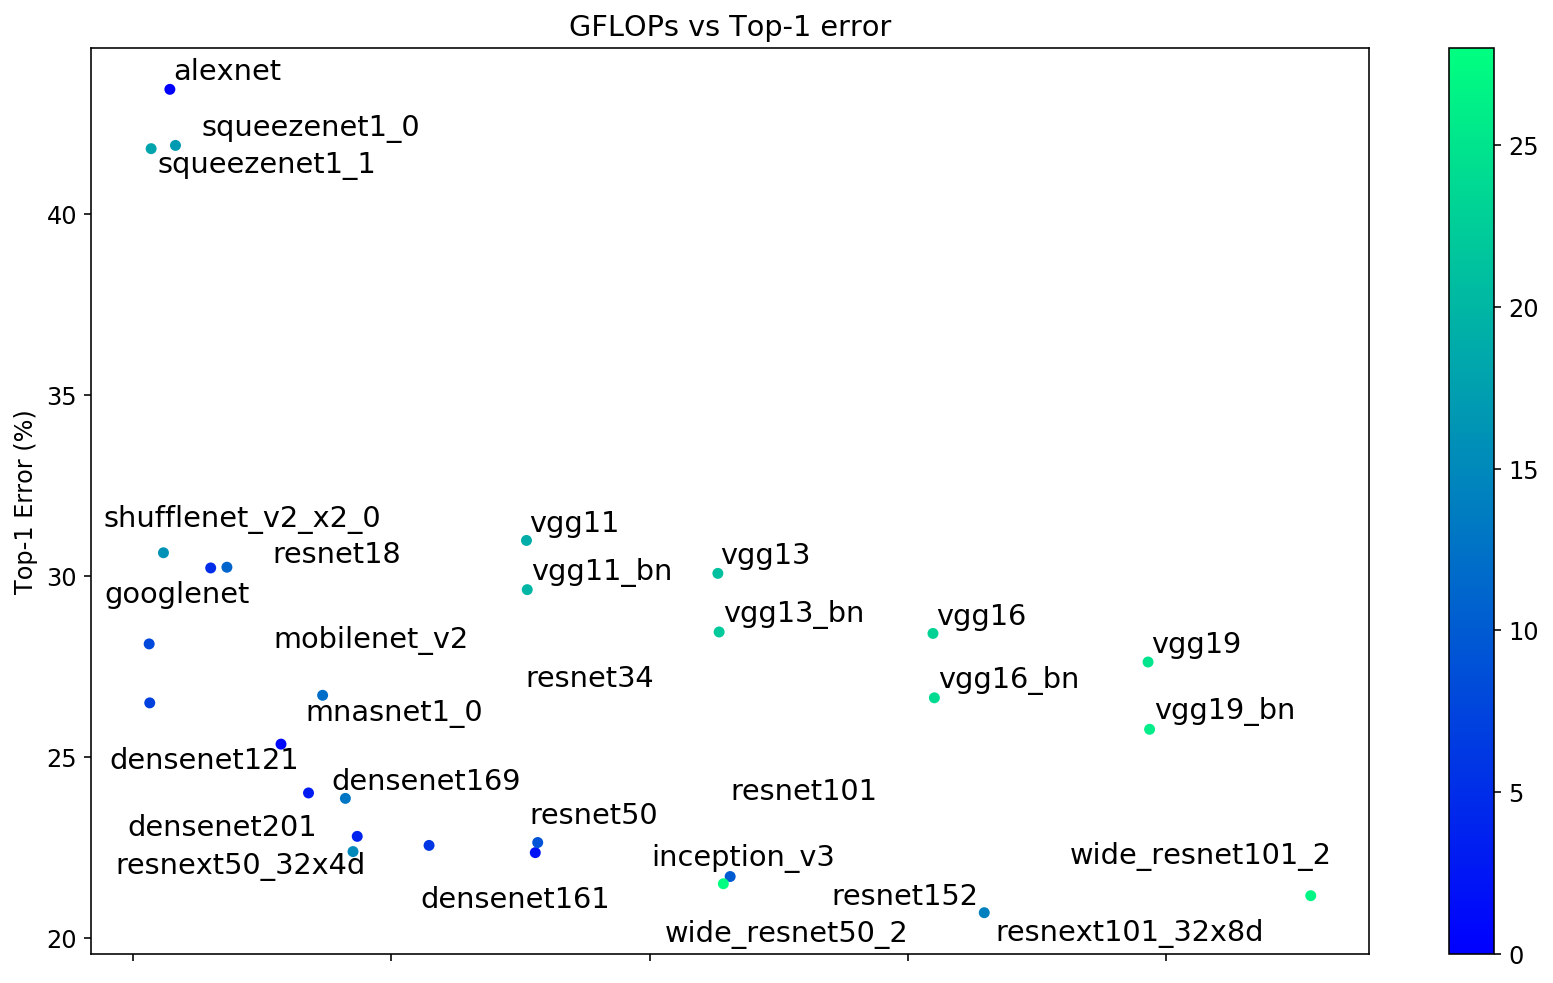

In [11]:
from matplotlib import cm
from adjustText import adjust_text
cmap = cm.get_cmap('winter')
#merge_df.plot.scatter(x ='top1', y='GFLOPS')

ax = merge_df.plot('GFLOPS', 'top1', kind='scatter',
        c=range(len(merge_df)), colormap=cmap, figsize=(12,7),
                  title="GFLOPs vs Top-1 error")
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Top-1 Error (%)")
#merge_df[['GFLOPS','top1','model']].apply(lambda row: ax.text(*row),axis=1);
texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(merge_df['GFLOPS'],merge_df['top1'],merge_df['model'])]
#ax.text(0.823441, 41.90, 'squeezenet1_0' )
# needs citation https://github.com/Phlya/adjustText
#colormap.remove()
adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/top1error.png',dpi=300)


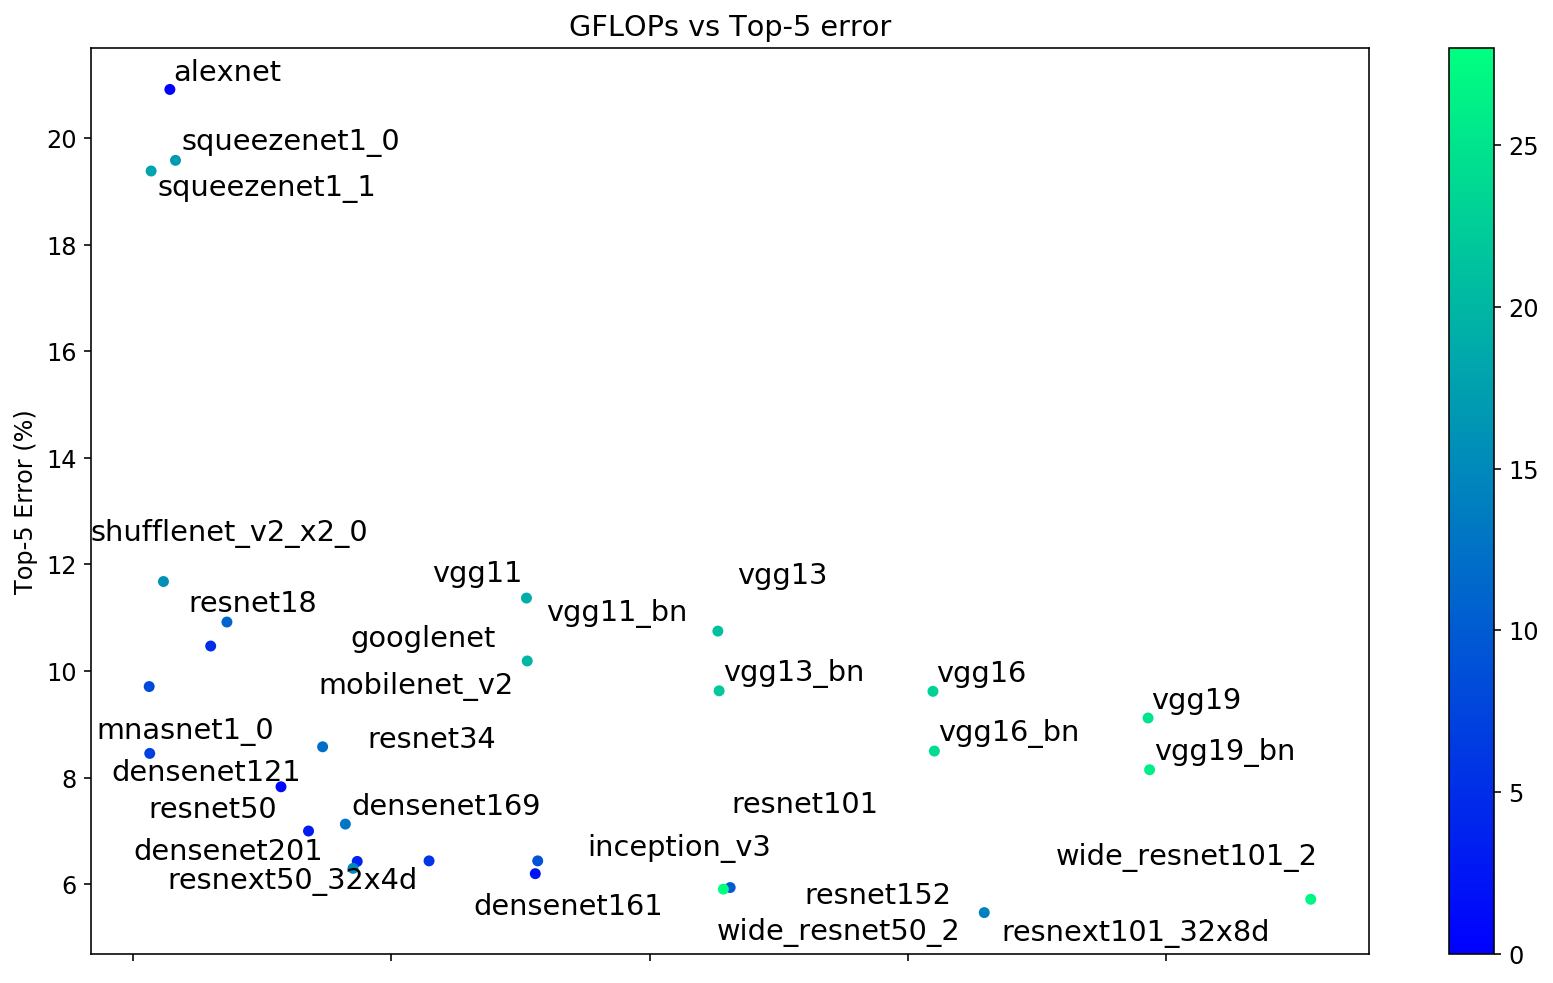

In [12]:
cmap1= cm.get_cmap('winter')
ax = merge_df.plot('GFLOPS', 'top5', kind='scatter',
        c=range(len(merge_df)),colormap=cmap1, figsize=(12,7),
                  title="GFLOPs vs Top-5 error")
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Top-5 Error (%)")
#merge_df[['GFLOPS','top5','model']].apply(lambda row: ax.text(*row),axis=1);
texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(merge_df['GFLOPS'],merge_df['top5'],merge_df['model'])]
adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/top5error.png',dpi=300)

In [13]:
x, y = merge_df['GFLOPS'],merge_df['top5'] 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print("R squared", r_value ** 2)

slope -0.26447035797614316 
intercept 11.457116334379469
r_value -0.43211360774286034
p_value 0.019237046397276903
std_err 0.10622253088720421
R squared 0.18672216999655056


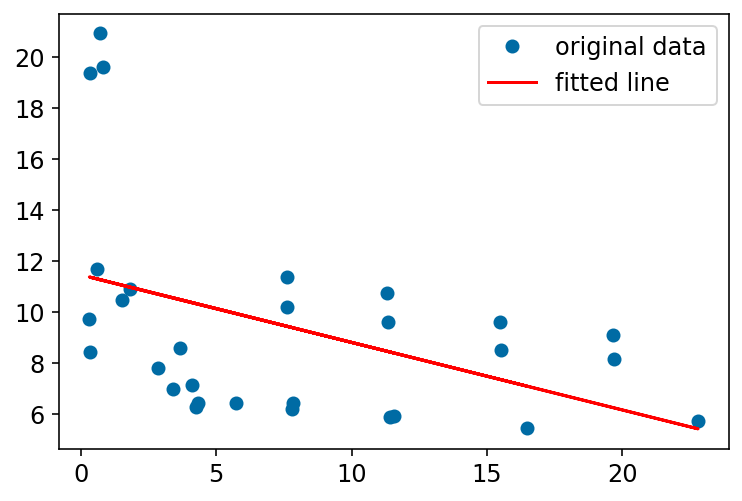

In [14]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

The complexity measured in FLOPs does not necessarily improve the accuracy (or decrease the error).

However, within the same architecture, e.g., VGG and resnet, the error decreases linearly with FLOPs

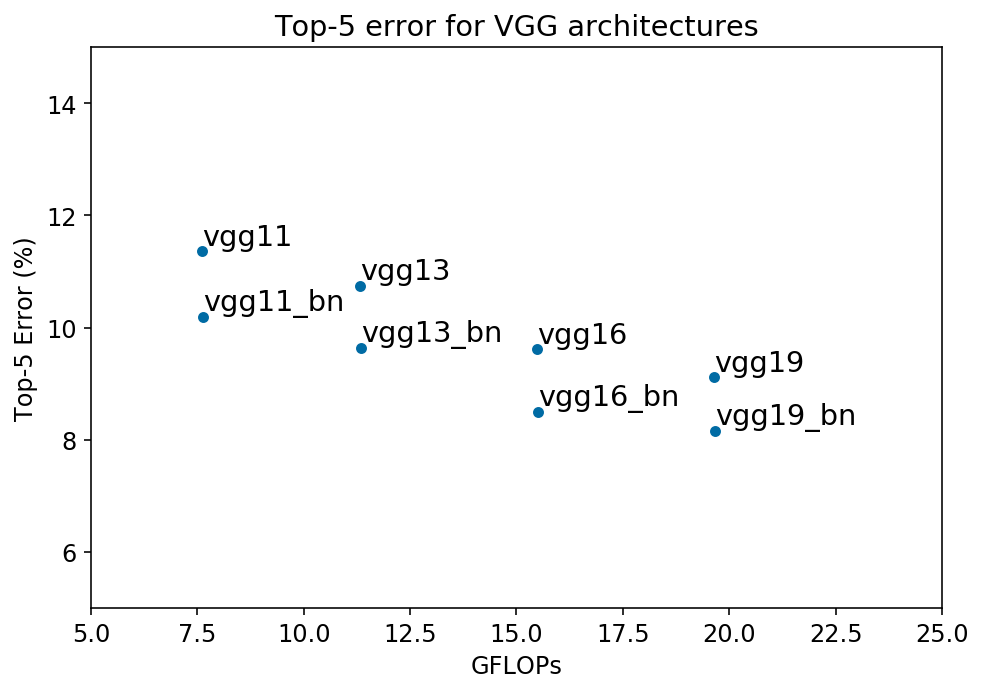

In [15]:
vggset = ['vgg11','vgg13','vgg16','vgg19','vgg11_bn','vgg13_bn','vgg16_bn','vgg19_bn']
vgg = merge_df.loc[merge_df.model.isin(vggset)]
ax = vgg.plot('GFLOPS', 'top5', kind='scatter',
         figsize=(7,5))
ax.set_xlim(5,25)
ax.set_ylim(5,15)
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Top-5 Error (%)")
ax.set_title("Top-5 error for VGG architectures")
vgg[['GFLOPS','top5','model']].apply(lambda row: ax.text(*row,ha='left',va='bottom',size='large'),axis=1);
plt.tight_layout()
ax.figure.savefig("viz/vggtop5error.png",dpi=300)

In [16]:
x, y = vgg['GFLOPS'],vgg['top5'] 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print("R squared", r_value ** 2)

slope -0.1881132778939686 
intercept 12.211244926500065
r_value -0.8313541476640571
p_value 0.010525762985377246
std_err 0.05133715042665655
R squared 0.691149718838231


## power monitor readings

In [17]:
df_reading = pd.read_csv("logs/power_reading_1.csv")

In [18]:
df_reading['last_changed'] = pd.to_datetime(df_reading['last_changed'], errors='coerce')
df_reading.dropna(subset=['last_changed'], inplace=True)
df_reading.set_index('last_changed', inplace=True)

In [19]:
df_reading.tail()

,entity_id,node_id,power_consumption,unit
last_changed,,,,
2020-05-30 14:32:33.790128+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.784,W
2020-05-30 14:32:36.793057+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.675,W
2020-05-30 14:32:39.782380+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.729,W
2020-05-30 14:32:42.790067+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.778,W
2020-05-30 14:32:45.788001+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.794,W


In [20]:
df_time_interval = pd.read_csv("logs/pm.csv")

In [21]:
print(df_time_interval.model.count())
df_time_interval.head()

30


,model,start_time,end_time
0,alexnet,2020-06-24 10:28:27.242060,2020-06-24 10:28:55.511093
1,densenet121,2020-06-24 10:28:55.725041,2020-06-24 10:29:41.709235
2,densenet161,2020-06-24 10:29:42.229888,2020-06-24 10:30:34.959060
3,densenet169,2020-06-24 10:30:35.267164,2020-06-24 10:31:29.224224
4,densenet201,2020-06-24 10:31:29.657847,2020-06-24 10:32:29.364626


In [22]:
df_time_interval['start_seconds']= [datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                  for start_time in df_time_interval.start_time]
df_time_interval['end_seconds'] = [datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S.%f") - timedelta(hours=1, minutes=0)
                                for end_time in df_time_interval.end_time]
df_time_interval['total_time'] = df_time_interval['end_seconds'] - df_time_interval['start_seconds']
df_time_interval['total_time'] = df_time_interval['total_time'].apply(lambda x: x.total_seconds())
df_time_interval.head()

,model,start_time,end_time,start_seconds,end_seconds,total_time
0,alexnet,2020-06-24 10:28:27.242060,2020-06-24 10:28:55.511093,2020-06-24 09:28:27.242060,2020-06-24 09:28:55.511093,28.269033
1,densenet121,2020-06-24 10:28:55.725041,2020-06-24 10:29:41.709235,2020-06-24 09:28:55.725041,2020-06-24 09:29:41.709235,45.984194
2,densenet161,2020-06-24 10:29:42.229888,2020-06-24 10:30:34.959060,2020-06-24 09:29:42.229888,2020-06-24 09:30:34.959060,52.729172
3,densenet169,2020-06-24 10:30:35.267164,2020-06-24 10:31:29.224224,2020-06-24 09:30:35.267164,2020-06-24 09:31:29.224224,53.957060
4,densenet201,2020-06-24 10:31:29.657847,2020-06-24 10:32:29.364626,2020-06-24 09:31:29.657847,2020-06-24 09:32:29.364626,59.706779


In [23]:
df_time_interval['s_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["start_seconds"]]
df_time_interval['e_date'] = [x.date().strftime("%Y-%m-%d") for x in df_time_interval["end_seconds"]]
df_time_interval['s_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["start_seconds"]]
df_time_interval['e_time'] = [x.time().strftime("%H:%M:%S") for x in df_time_interval["end_seconds"]]
df_time_interval.head()

,model,start_time,end_time,start_seconds,end_seconds,total_time,s_date,e_date,s_time,e_time
0,alexnet,2020-06-24 10:28:27.242060,2020-06-24 10:28:55.511093,2020-06-24 09:28:27.242060,2020-06-24 09:28:55.511093,28.269033,2020-06-24,2020-06-24,09:28:27,09:28:55
1,densenet121,2020-06-24 10:28:55.725041,2020-06-24 10:29:41.709235,2020-06-24 09:28:55.725041,2020-06-24 09:29:41.709235,45.984194,2020-06-24,2020-06-24,09:28:55,09:29:41
2,densenet161,2020-06-24 10:29:42.229888,2020-06-24 10:30:34.959060,2020-06-24 09:29:42.229888,2020-06-24 09:30:34.959060,52.729172,2020-06-24,2020-06-24,09:29:42,09:30:34
3,densenet169,2020-06-24 10:30:35.267164,2020-06-24 10:31:29.224224,2020-06-24 09:30:35.267164,2020-06-24 09:31:29.224224,53.957060,2020-06-24,2020-06-24,09:30:35,09:31:29
4,densenet201,2020-06-24 10:31:29.657847,2020-06-24 10:32:29.364626,2020-06-24 09:31:29.657847,2020-06-24 09:32:29.364626,59.706779,2020-06-24,2020-06-24,09:31:29,09:32:29


In [24]:
def power_mean(s_date,e_date,s_time,e_time):
    subset_df = df_reading.loc[s_date:e_date].between_time(s_time, e_time)[['power_consumption']]
    return subset_df['power_consumption'].mean()


In [25]:
for index, row in df_time_interval.iterrows(): 
    df_time_interval.at[index,'mean_power'] = power_mean(row['s_date'],row['e_date'],
                                            row['s_time'],row['e_time'])

In [26]:
df_time_interval['power'] = df_time_interval['mean_power'] * df_time_interval['total_time']
df_time_interval.head()

,model,start_time,end_time,start_seconds,end_seconds,total_time,s_date,e_date,s_time,e_time,mean_power,power
0,alexnet,2020-06-24 10:28:27.242060,2020-06-24 10:28:55.511093,2020-06-24 09:28:27.242060,2020-06-24 09:28:55.511093,28.269033,2020-06-24,2020-06-24,09:28:27,09:28:55,180.525600,5103.284144
1,densenet121,2020-06-24 10:28:55.725041,2020-06-24 10:29:41.709235,2020-06-24 09:28:55.725041,2020-06-24 09:29:41.709235,45.984194,2020-06-24,2020-06-24,09:28:55,09:29:41,177.310733,8153.491160
2,densenet161,2020-06-24 10:29:42.229888,2020-06-24 10:30:34.959060,2020-06-24 09:29:42.229888,2020-06-24 09:30:34.959060,52.729172,2020-06-24,2020-06-24,09:29:42,09:30:34,211.831000,11169.673234
3,densenet169,2020-06-24 10:30:35.267164,2020-06-24 10:31:29.224224,2020-06-24 09:30:35.267164,2020-06-24 09:31:29.224224,53.957060,2020-06-24,2020-06-24,09:30:35,09:31:29,180.346000,9730.939943
4,densenet201,2020-06-24 10:31:29.657847,2020-06-24 10:32:29.364626,2020-06-24 09:31:29.657847,2020-06-24 09:32:29.364626,59.706779,2020-06-24,2020-06-24,09:31:29,09:32:29,187.401750,11189.154871


In [27]:
new_df = df_time_interval.merge(merge_df, on='model')
new_df.model.count()

27

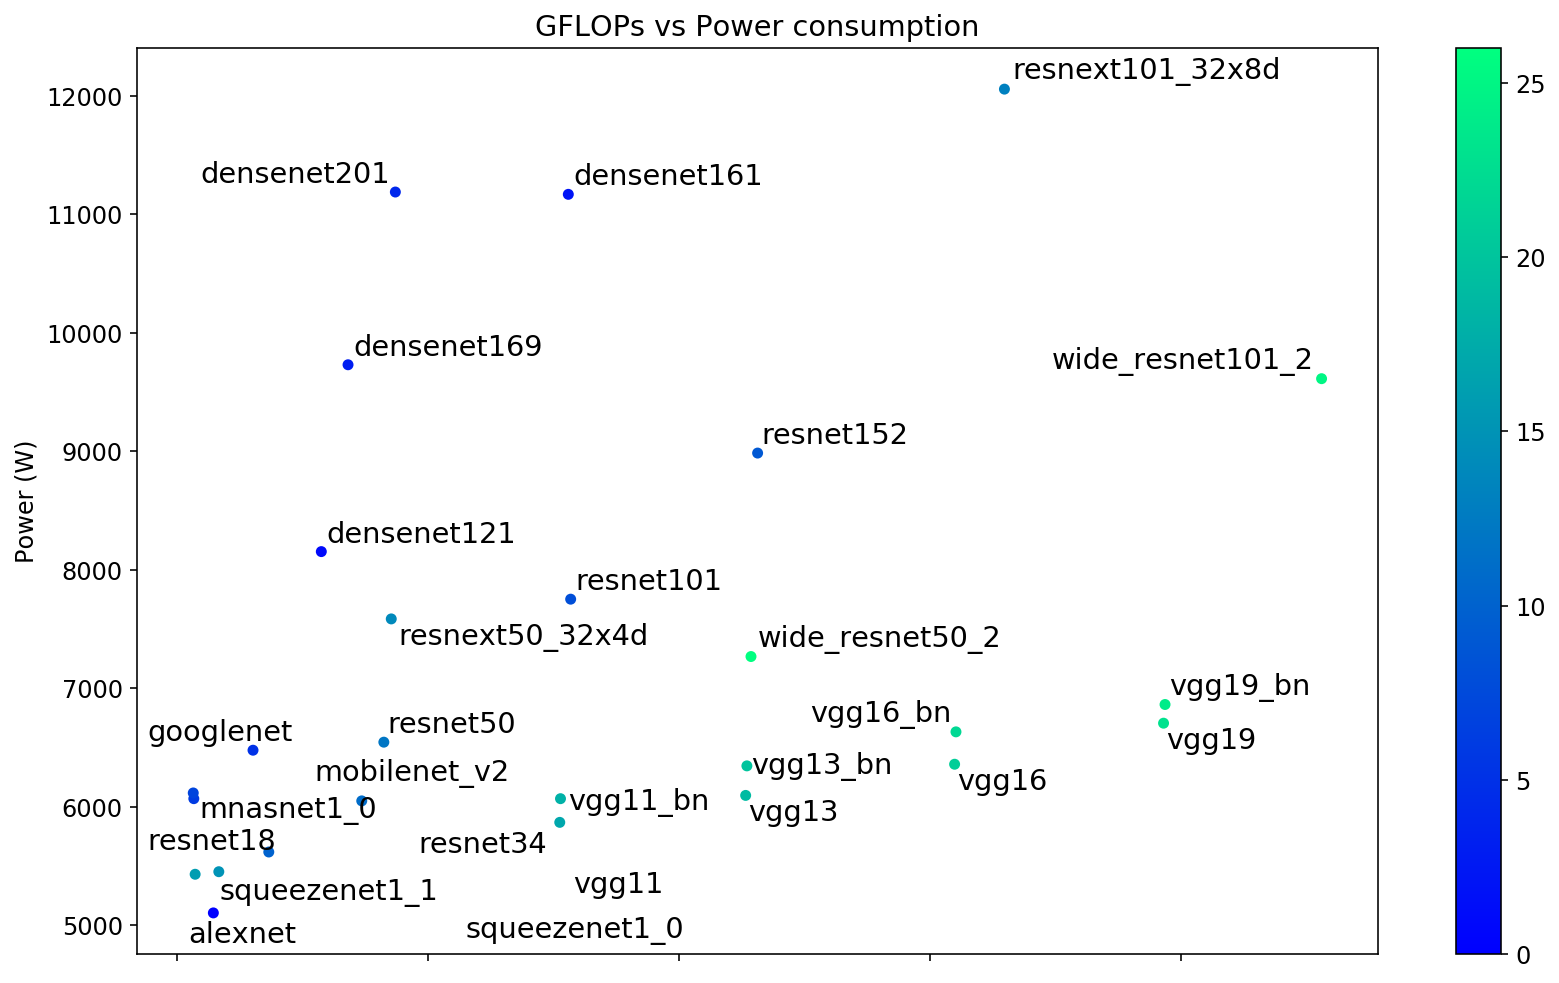

In [28]:
ax = new_df.plot('GFLOPS', 'power', kind='scatter',
        c=range(len(new_df)), colormap=cmap, figsize=(12,7),
                  title="GFLOPs vs Power consumption")
ax.set_xlabel("GFLOPs")
ax.set_ylabel("Power (W)")
#merge_df[['GFLOPS','top1','model']].apply(lambda row: ax.text(*row),axis=1);
texts = [ax.text(x, y, name,size='large') 
         for x, y, name in zip(new_df['GFLOPS'],new_df['power'],new_df['model'])]
#ax.text(0.823441, 41.90, 'squeezenet1_0' )
# needs citation https://github.com/Phlya/adjustText
#colormap.remove()
adjust_text(texts)
plt.tight_layout()
ax.figure.savefig('viz/gflops_power.png',dpi=300)

In [29]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(new_df['GFLOPS'],new_df['power'] )
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)

slope 87.75178532088083 
intercept 6609.664425544661
r_value 0.30929855796592093
p_value 0.1164405105709626
std_err 53.96008033786532
R squared  0.09566559795979815


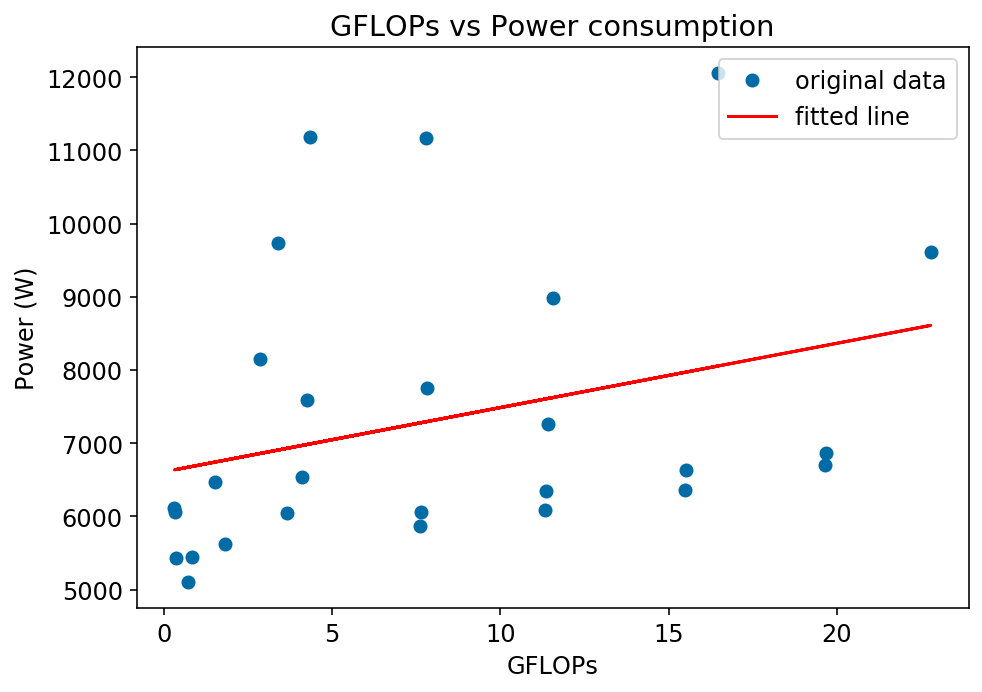

In [30]:
x = new_df['GFLOPS']
y = new_df['power']
plt.figure(figsize=(7,5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("GFLOPs")
plt.ylabel("Power (W)")
plt.title("GFLOPs vs Power consumption")
plt.legend()
plt.tight_layout()
plt.savefig('viz/gflops_power_fit.png',dpi=300)

In [31]:
vgg_df = df_time_interval.merge(vgg, on='model')

In [32]:
#ax = vgg_df.plot('GFLOPS', 'power', kind='scatter')
slope, intercept, r_value, p_value, std_err = stats.linregress(vgg_df['GFLOPS'],vgg_df['power'] )
print(f"slope {slope} \nintercept {intercept}\nr_value {r_value}\np_value {p_value}\nstd_err {std_err}")
print('R squared ', r_value ** 2)

slope 67.68618291850078 
intercept 5450.908831479768
r_value 0.9391521839367057
p_value 0.0005378259577875401
std_err 10.106874425564875
R squared  0.882006824593084


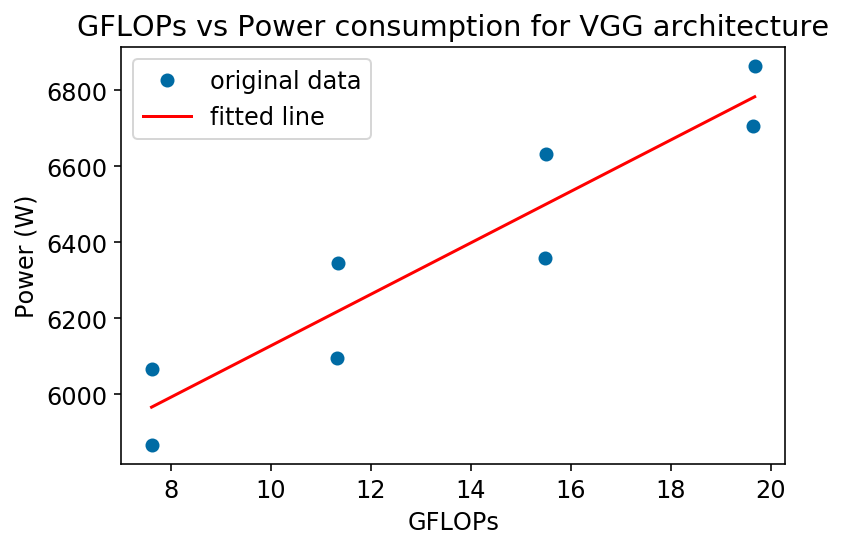

In [33]:
x = vgg_df['GFLOPS']
y = vgg_df['power']
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel("GFLOPs")
plt.ylabel("Power (W)")
plt.title("GFLOPs vs Power consumption for VGG architecture")
plt.legend()
plt.tight_layout()
plt.savefig('viz/vgg_gflops_power_fit.png',dpi=300)

In [35]:
df_time_interval['power (kWh)'] = df_time_interval['mean_power'] * df_time_interval['total_time'] / (1000 * 3600)
df_time_interval["datacenter_power"] = df_time_interval['power (kWh)'] * 1.58

df_co2 = pd.read_csv("../BERT/results/co2data.csv")
uk_co2 = df_co2.loc[df_co2.country == 'United Kingdom'].impact.mean()

df_time_interval['CO2e'] = uk_co2 * df_time_interval['datacenter_power']
df_time_interval['kg CO2e/kWh'] = df_time_interval['CO2e'] /1000

In [38]:
features = ['model','power','power (kWh)','datacenter_power','kg CO2e/kWh']
df_time_interval[features]

,model,power,power (kWh),datacenter_power,kg CO2e/kWh
0,alexnet,5103.284144,0.001418,0.002240,0.001395
1,densenet121,8153.491160,0.002265,0.003578,0.002229
2,densenet161,11169.673234,0.003103,0.004902,0.003054
3,densenet169,9730.939943,0.002703,0.004271,0.002661
4,densenet201,11189.154871,0.003108,0.004911,0.003059
5,googlenet,6476.798429,0.001799,0.002843,0.001771
6,mnasnet0_5,6054.304472,0.001682,0.002657,0.001655
7,mnasnet1_0,6067.766303,0.001685,0.002663,0.001659
8,mobilenet_v2,6115.959804,0.001699,0.002684,0.001672
9,resnet101,7751.937469,0.002153,0.003402,0.002120
